 Loading Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Loading Dataset

In [2]:
data = pd.read_csv('../input/us-dollar-inr-rupee-dataset20032021/USDINRX.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,45.709000,45.728001,45.615002,45.709999,45.709999,0.0
1,2003-12-02,45.709000,45.719002,45.560001,45.629002,45.629002,0.0
2,2003-12-03,45.632000,45.655998,45.474998,45.549999,45.549999,0.0
3,2003-12-04,45.548000,45.612999,45.519001,45.548000,45.548000,0.0
4,2003-12-05,45.549999,45.566002,45.449001,45.449001,45.449001,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4650 entries, 0 to 4649
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4650 non-null   object 
 1   Open       4598 non-null   float64
 2   High       4598 non-null   float64
 3   Low        4598 non-null   float64
 4   Close      4598 non-null   float64
 5   Adj Close  4598 non-null   float64
 6   Volume     4598 non-null   float64
dtypes: float64(6), object(1)
memory usage: 254.4+ KB


 Checking for null Values

In [4]:
data.isnull().sum()

Date          0
Open         52
High         52
Low          52
Close        52
Adj Close    52
Volume       52
dtype: int64

Drop missing Values or null Values

In [5]:
data = data.dropna()

Ensuring the missing values are handled properly

In [6]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Changing the time format 

In [7]:
data = data.astype({'Date': 'datetime64[ns]'})

Plotting the Rupees close price

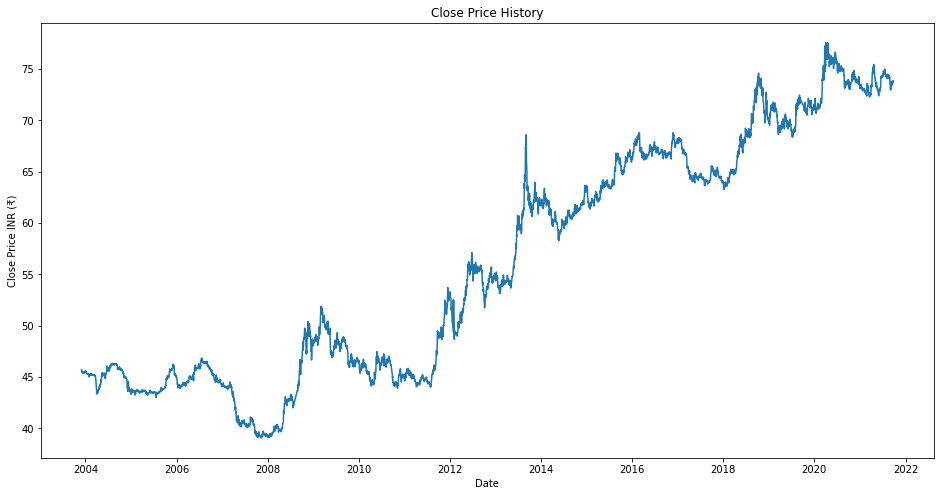

In [8]:
date = data['Date']
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Date'],data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price INR (₹)')
plt.show()

In [9]:
df = data.filter(['Close'])
dataset = df.values
train_data_len = math.ceil(len(dataset)*.8)
train_data_len

3679

Transform features by scaling each feature to a given range

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(dataset)
scaler_data

array([[0.17300456],
       [0.17090211],
       [0.16885141],
       ...,
       [0.90195204],
       [0.90408569],
       [0.90317965]])

In [11]:
train_data = scaler_data[0:train_data_len , :]

In [12]:
x_train = []
y_train = []

for i in range(60 , len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [13]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

Loading Tensorflow and keras library

In [15]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

Building Model

In [16]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50))
model.add(Dense(1))

2021-12-10 16:32:58.721405: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-10 16:32:58.818926: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-10 16:32:58.819644: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-10 16:32:58.820930: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [17]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [18]:
history=model.fit(x_train, y_train, epochs=10, batch_size=1)

2021-12-10 16:33:01.659371: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2021-12-10 16:33:04.700653: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


3619/3619 [==============================] - 27s 6ms/step - loss: 4.8742e-04
Epoch 2/10
3619/3619 [==============================] - 23s 6ms/step - loss: 2.1579e-04
Epoch 3/10
3619/3619 [==============================] - 23s 6ms/step - loss: 1.9247e-04
Epoch 4/10
3619/3619 [==============================] - 23s 6ms/step - loss: 1.2525e-04
Epoch 5/10
3619/3619 [==============================] - 23s 6ms/step - loss: 1.3726e-04
Epoch 6/10
3619/3619 [==============================] - 23s 6ms/step - loss: 1.1212e-04
Epoch 7/10
3619/3619 [==============================] - 23s 6ms/step - loss: 1.1093e-04
Epoch 8/10
3619/3619 [==============================] - 22s 6ms/step - loss: 1.0765e-04
Epoch 9/10
3619/3619 [==============================] - 23s 6ms/step - loss: 9.8846e-05
Epoch 10/10
3619/3619 [==============================] - 24s 7ms/step - loss: 9.9587e-05


In [19]:
test_data = scaler_data[train_data_len - 60:, :]

In [20]:
x_test = []
y_test = dataset[train_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [21]:
x_test = np.array(x_test)

In [22]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

Making Prediction

In [23]:
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

Plotting the prediction

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


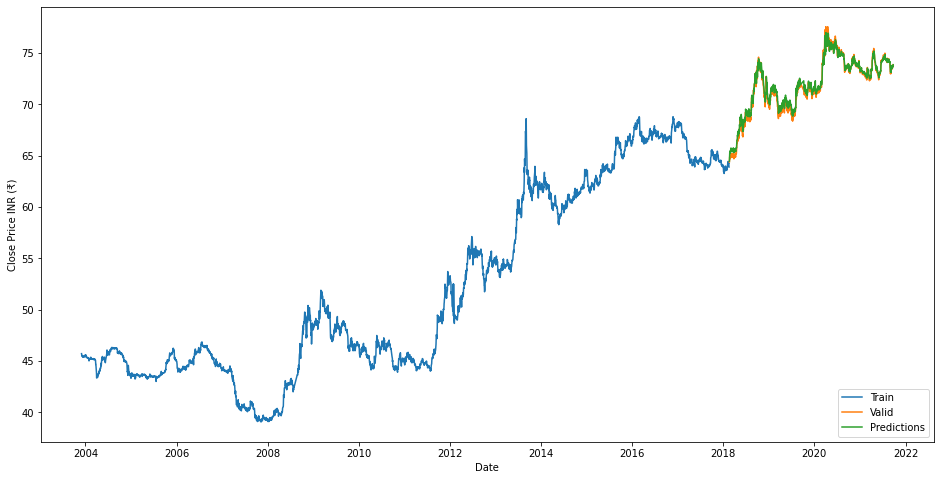

In [24]:
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = pred
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.ylabel('Close Price INR (₹)')
plt.plot(train['Date'],train['Close'])
plt.plot(valid['Date'],valid[['Close','Predictions']])
plt.legend(['Train','Valid','Predictions'], loc='lower right')
plt.show()

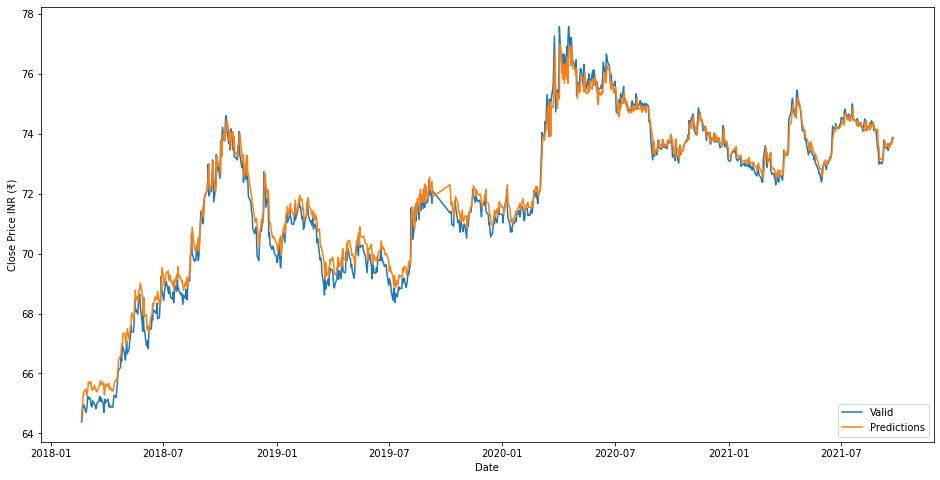

In [25]:
plt.figure(figsize=(16,8))
plt.plot(valid['Date'],valid[['Close','Predictions']])
plt.legend(['Valid','Predictions'], loc='lower right')
plt.xlabel('Date')
plt.ylabel('Close Price INR (₹)')
plt.show()